In [8]:
import imageio
import numpy as np
import cv2
from PIL import Image
import pyautogui
pyautogui.PAUSE = 0.5

(1080, 1920, 3)


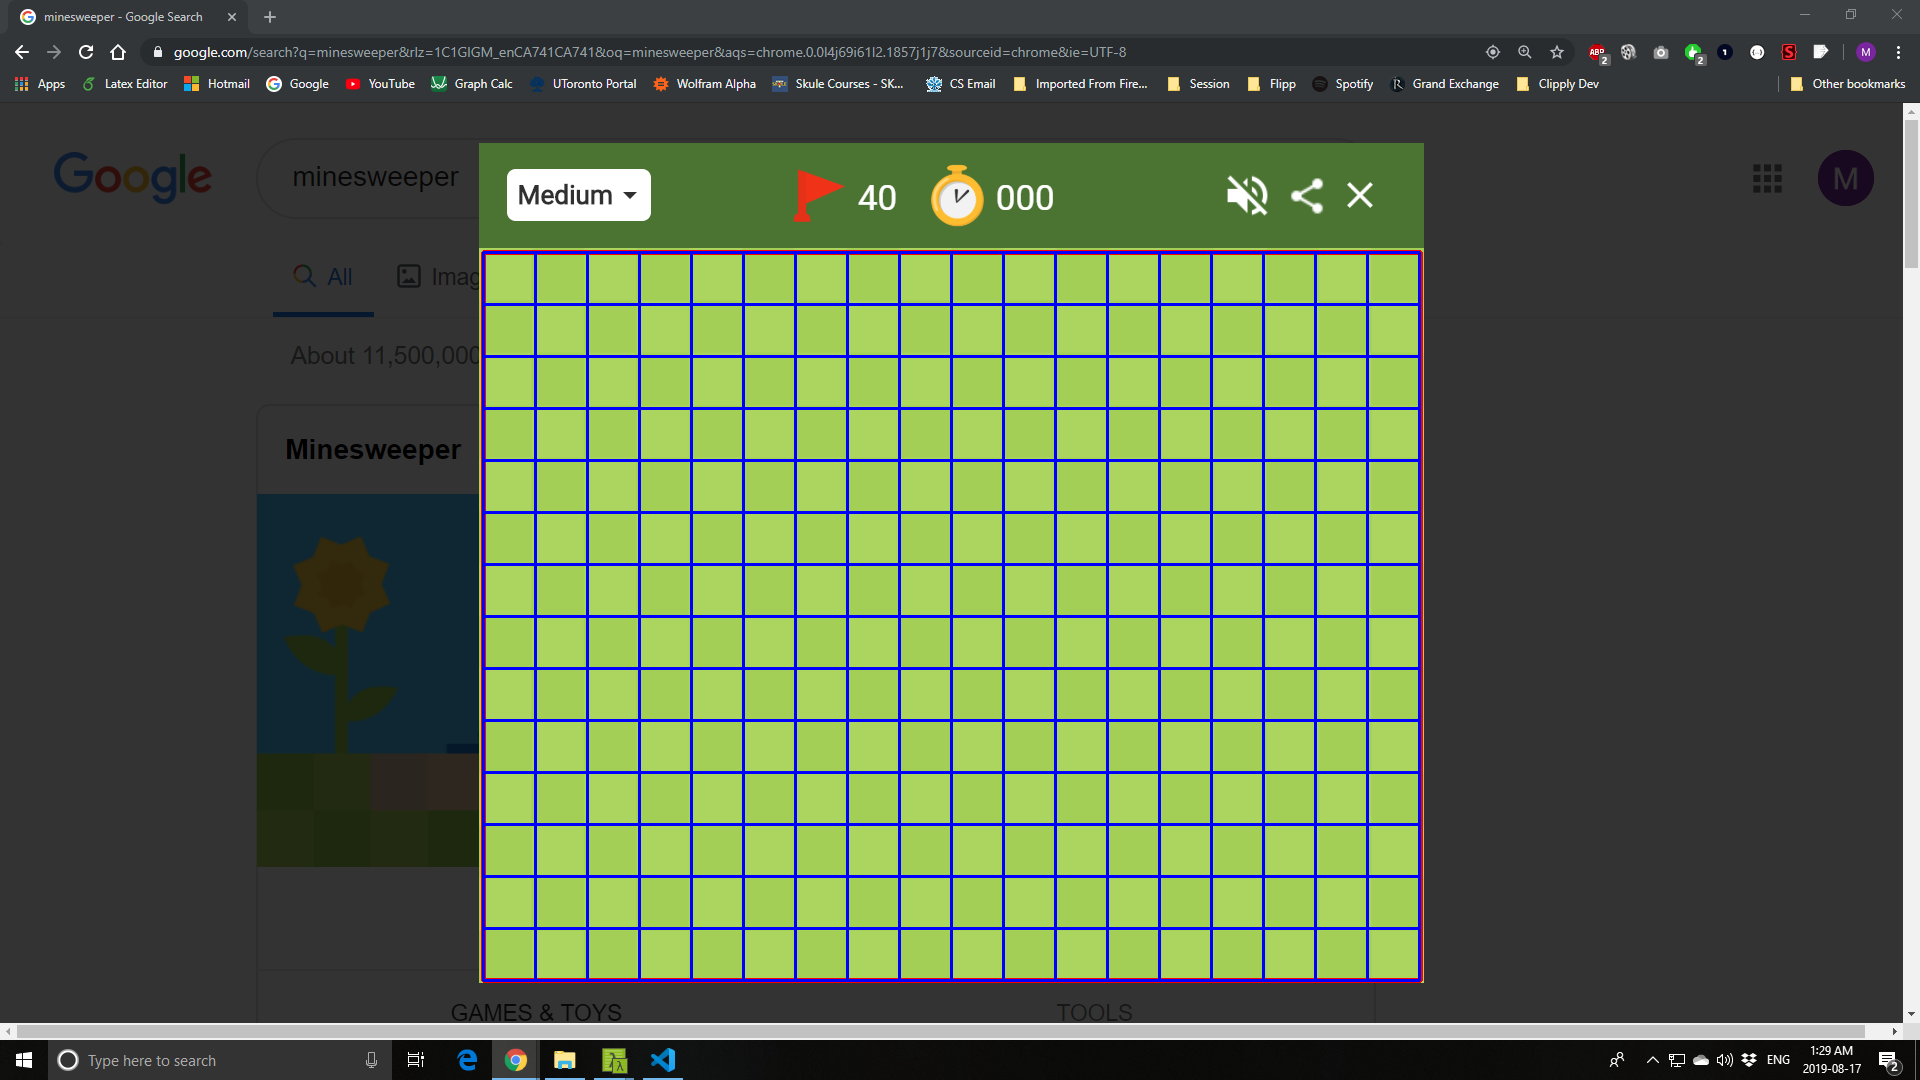

In [120]:
def getGridPosition():
    screen = np.asarray(imageio.imread('<screen>'))
    screen = cv2.cvtColor(screen, cv2.COLOR_BGR2GRAY)
    grid_template = cv2.imread('../resources/medium_grid.png', cv2.IMREAD_GRAYSCALE)    
    (tH, tW) = grid_template.shape[:2]
    found = None
    
    for scale in np.linspace(0.2, 1.0, 50)[::-1]:        
        resized = np.array(Image.fromarray(screen).resize( (int(screen.shape[1] * scale), int(screen.shape[0] * scale)) ))      
        r = screen.shape[0] / float(resized.shape[0])        
        
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break        
        
        result = cv2.matchTemplate(resized, grid_template, cv2.TM_CCOEFF_NORMED)
        
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)       
        
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)       
        
    (maxVal, maxLoc, r) = found
    if maxVal < 0.9:
        raise Exception("Unable to find a suitable playing grid")
        
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))    
    
    return (startX, startY), (endX, endY)

screen = np.asarray(imageio.imread('<screen>'))
print(screen.shape)


position = getGridPosition()
cv2.rectangle(screen, position[0], position[1], (255,0,0), 3)
grid_w, grid_h = (position[1][0]-position[0][0], position[1][1]-position[0][1])
cell_w, cell_h = (int(grid_w/18), int(grid_h/14))

for x in np.linspace(0,grid_w,num=18, endpoint=False):
    for y in np.linspace(0,grid_h, num=14, endpoint=False):
        dx, dy = int(x+position[0][0]), int(y+position[0][1])
        cv2.rectangle(screen, (dx,dy), (dx+cell_w, dy+cell_h), (0,0,255), 2)

Image.fromarray(screen)
